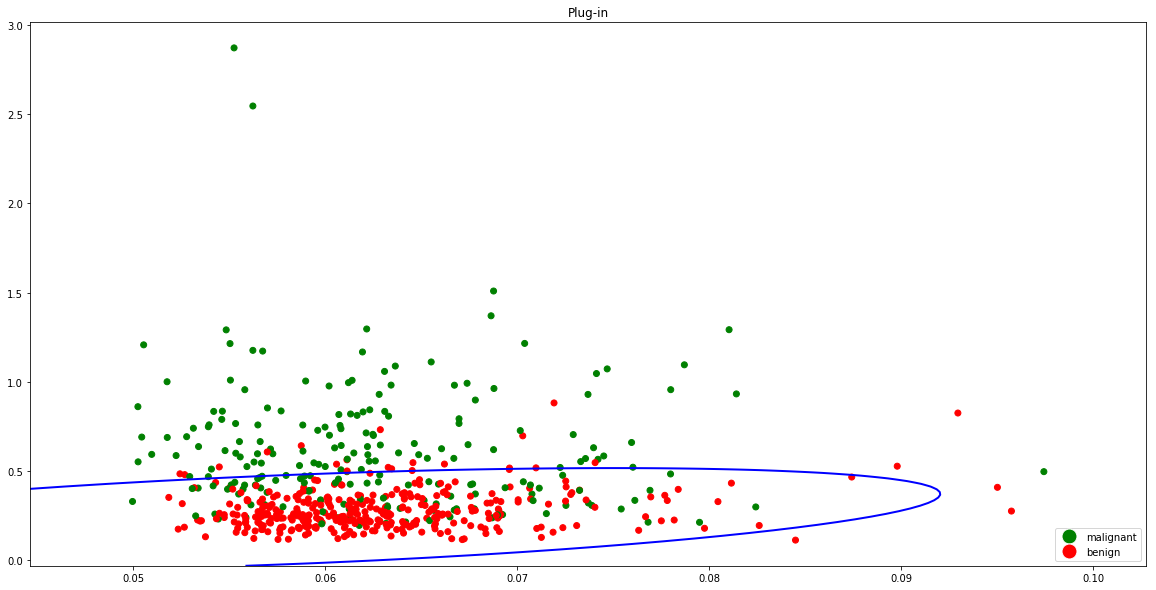

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

bc = load_breast_cancer()
data = bc.data[:, 9:11]
target =  bc.target
target_names=bc.target_names
colors = np.array(['green', 'red'])


clf = QuadraticDiscriminantAnalysis()
clf.fit(data, target)

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(data[:, 0], data[:, 1], color=colors[target])
handlers = [Line2D([0], [0], marker='o', color='w', label=target_names[i], 
            markerfacecolor=colors[i], markersize=15) for i in range(0, len(colors))]
ax.legend(handles=handlers, loc='lower right')
ax.set_title('Plug-in')

x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 0].reshape(xx.shape)
ax.contour(xx, yy, Z, [0.5], linewidths=2, colors='blue')
plt.show()